In [1]:
import sys
sys.path.append('../')
import os
import random
import zipfile
from matplotlib import pyplot as plt
#import torchvision
#from Run_Experiments.mri_dataset import MRI_Dataset
from PIL import Image
import nibabel as nib
import numpy as np
from Data_Preprocessing.mri_scale import get_percentiles, clip_image_intensity
from Data_Preprocessing.mri_slice import generate_slice_axial, generate_slice_coronal, generate_slice_sagittal

**Shows a random image from the dataset**

In [20]:
slices = ['21', '23', '43']

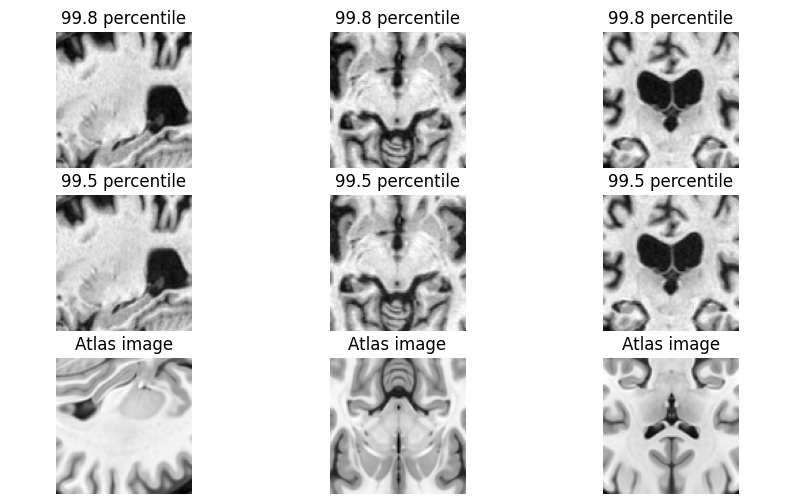

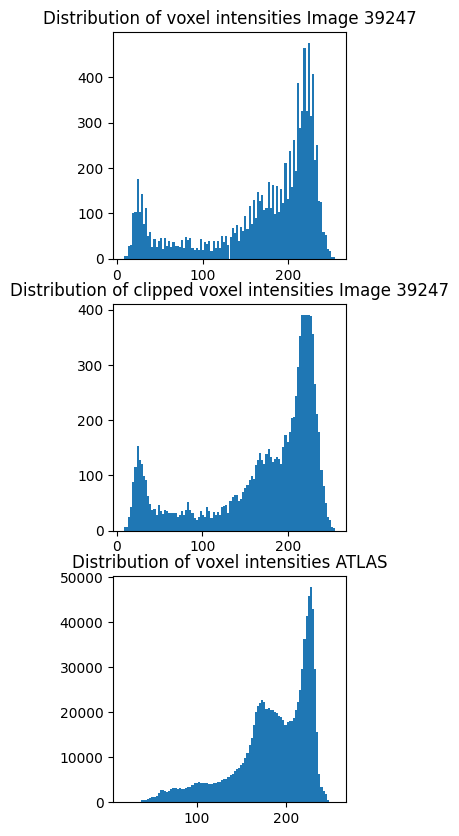

[106 126 142 ... 188 185 179]
[106.52445 126.06921 142.60289 ... 188.24583 185.15576 179.12039]


In [42]:
for subdir, dirs, files in os.walk('/Users/olath/Documents/ADNI_SLICED_RESCALED/'):

    num_of_images = len(dirs)

    image = dirs[random.randint(0, num_of_images-1)]

    path = '/Users/olath/Documents/ADNI_SLICED_RESCALED'

    image = str(image)

    #image_archive1 = zipfile.ZipFile('/Volumes/Extreme SSD/ADNI_SLICED/'+image)

    #image_archive1.extract('saggital/'+slices[0]+'.png', 'temp_folder_saggital')

    #image_archive1.extract('axial/'+slices[1]+'.png', 'temp_folder_axial')

    #image_archive1.extract('coronal/'+slices[2]+'.png', 'temp_folder_coronal')

    image1 = Image.open(path+"/"+image+"/sagittal/"+slices[0]+'.png')
 
    image2 = Image.open(path+"/"+image+"/axial/"+slices[1]+'.png')

    image3 = Image.open(path+"/"+image+"/coronal/"+slices[2]+'.png')

    atlas1 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/saggital/"+slices[0]+'.png')
 
    atlas2 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/axial/"+slices[1]+'.png')

    atlas3 = Image.open(r"/Volumes/Extreme SSD/ATLAS_SLICED/mni_icbm152_t1_tal_nlin_sym_/coronal/"+slices[2]+'.png')

    img_nifti = nib.load('/Volumes/Extreme SSD/ADNI_PROCESSED/' + image+'.nii.gz')

    img_arr = np.array(img_nifti.dataobj)

    atlas_nifti = nib.load('/Volumes/Extreme SSD/Download/mni_icbm152_nlin_sym_09c/mni_icbm152_t1_tal_nlin_sym_09c.nii')

    atlas_arr = np.array(atlas_nifti.dataobj)

    lower_threshold, upper_threshold = get_percentiles(img_arr,0.3,99.7)

    img_arr_clipped = clip_image_intensity(img_arr.copy(), 0, upper_threshold)

    image1_clipped = generate_slice_sagittal(int(slices[0]),img_arr_clipped) 
    image2_clipped = generate_slice_axial(int(slices[1]), img_arr_clipped)
    image3_clipped = generate_slice_coronal(int(slices[2]), img_arr_clipped)

    image1_clipped = Image.fromarray(image1_clipped*255/image1_clipped.max())
    image2_clipped = Image.fromarray(image2_clipped*255/image2_clipped.max())
    image3_clipped = Image.fromarray(image3_clipped*255/image3_clipped.max())
    
    

    images = [image1, image2, image3, image1_clipped, image2_clipped, image3_clipped, atlas1, atlas2, atlas3]

    fig = plt.figure(figsize=(10, 6))
    plt.axis('off')

    for i in range(0, 3):
        fig.add_subplot(3,3, i+1)
        plt.imshow(images[i], cmap = 'grey')
        plt.title('99.8 percentile')
        plt.axis('off')

    for i in range(3, 6):
        fig.add_subplot(3,3, i+1)
        plt.imshow(images[i], cmap = 'grey')
        plt.title('99.5 percentile')
        plt.axis('off')

    for i in range(6, 9):
        fig.add_subplot(3,3, i+1)
        plt.imshow(images[i], cmap = 'grey')
        plt.title('Atlas image')
        plt.axis('off')

    plt.show()



    center_dim = [int(np.ceil(x/2)) for x in atlas_arr.shape]
    lower_dim = [int(x - 50) for x in center_dim]
    upper_dim = [int(x + 50) for x in center_dim]

    atlas_arr = atlas_arr[lower_dim[0]:upper_dim[0], lower_dim[1]:upper_dim[1], lower_dim[2]:upper_dim[2]]

    fig2 = plt.figure(figsize=(3, 10))
    plt.axis('off')

    fig2.add_subplot(3,1,1)
    plt.hist(np.array(image1).flatten(), 100)
    plt.title('Distribution of voxel intensities Image '+str(image))


    fig2.add_subplot(3,1,2)
    plt.hist(np.array(image1_clipped).flatten(), 100)
    plt.title('Distribution of clipped voxel intensities Image '+str(image))


    fig2.add_subplot(3,1,3)

    plt.hist(atlas_arr.flatten()*255/atlas_arr.max(), 100)
    plt.title('Distribution of voxel intensities ATLAS')


    plt.show()

    print(np.array(image1).flatten())

    print(np.array(image1_clipped).flatten())

    break

    
